In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,En busca del huevo perdido,1982
1,Blood Loss,2008
2,Anjo do Lodo,1951
3,Jaws 19,2015
4,Lost in Abroad,2012


In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [5]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c.head()

,title,year,name,type,character,n
1087,Batman Fights Dracula,1967,Jing Abalos,actor,Batman,1.0
16706,Batman v Superman: Dawn of Justice,2016,Ben Affleck,actor,Batman,1.0
16732,Justice League,2017,Ben Affleck,actor,Batman,NaN
16747,Suicide Squad,2016,Ben Affleck,actor,Batman,NaN
48373,Atom Man vs. Superman,1950,Kirk Alyn,actor,Superman,1.0


In [6]:
g = c.groupby(['year', 'character']).size()
u = g.unstack().fillna(0)
sup = u[u['Superman'] > u['Batman']]
sup

character,Batman,Superman
year,,
1948,0.0,1.0
1950,0.0,1.0
1951,0.0,2.0
1954,0.0,5.0
1955,0.0,1.0
1973,1.0,2.0
1978,0.0,2.0
1980,0.0,2.0
1983,0.0,2.0


In [7]:
len(sup)

11

In [8]:
g = c.groupby(['year', 'character']).size()
u = g.unstack().fillna(0)
diff = u['Superman'] - u['Batman']

In [9]:
len(diff[diff > 0])

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [10]:
bat = u[u['Superman'] < u['Batman']]
bat

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1949,2.0,0.0
1953,2.0,0.0
1957,2.0,0.0
1965,1.0,0.0
1966,1.0,0.0
1967,1.0,0.0


In [11]:
len(bat)

27

In [12]:
len(diff[diff < 0])

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

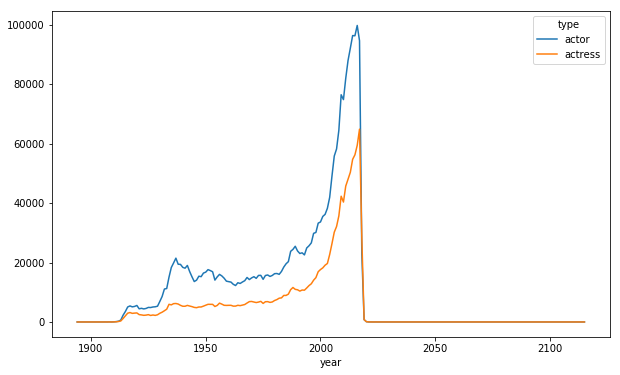

In [26]:
c = cast
gs = c.groupby(['year', 'type']).size()
gstype = gs.sort_index().unstack('type').fillna(0)
gstype.plot(figsize=(10, 6))

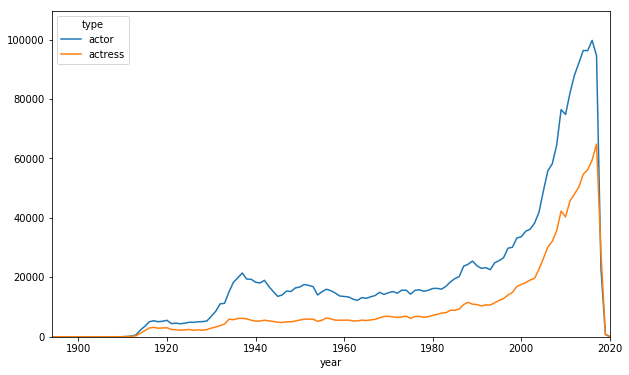

In [27]:
gstype.plot(ylim=[0, gstype[['actor']].max()[0] + 10**4], xlim=[gstype.index.min(), 2020], figsize=(10, 6))

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

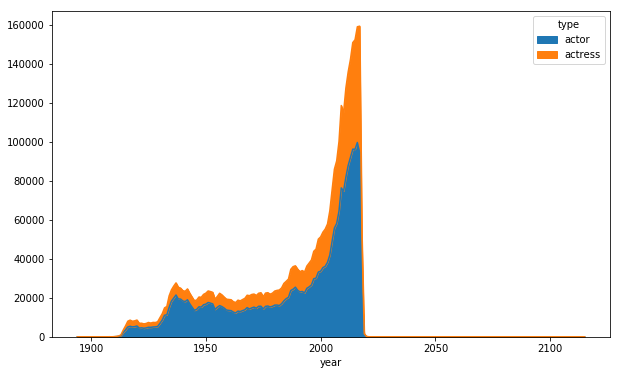

In [28]:
c = cast
gs = c.groupby(['year', 'type']).size()
gstype = gs.sort_index().unstack('type').fillna(0)
gstype.plot(kind='area', figsize=(10, 6))

In [16]:
gstype[['actor']].max()

type
actor    99722.0
dtype: float64

In [17]:
gstype[['actress']].max()

type
actress    64843.0
dtype: float64

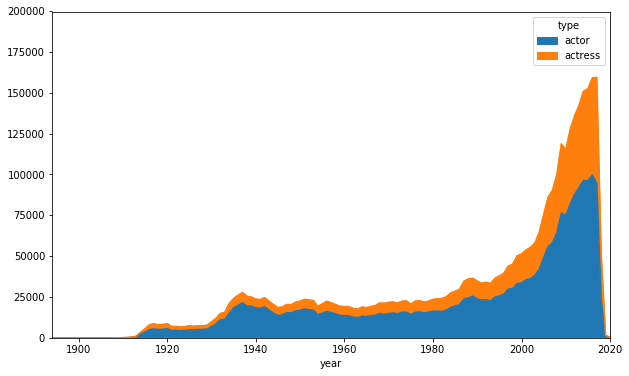

In [29]:
gstype.plot(ylim=[0, gstype[['actor']].max()[0] + 10**5], xlim=[gstype.index.min(), 2020], kind='area', figsize=(10, 6))

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

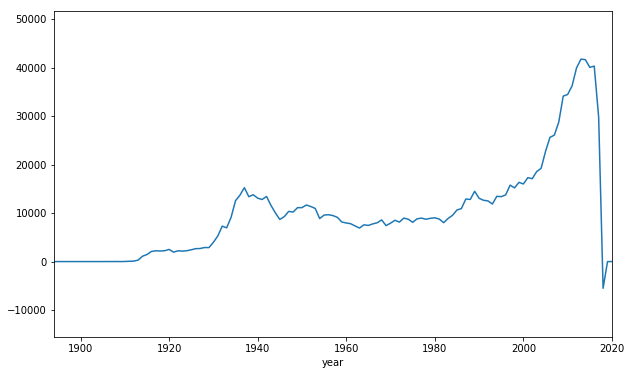

In [30]:
c = cast
gs = c.groupby(['year', 'type']).size()
gstype = gs.sort_index().unstack('type').fillna(0)
diff = gstype['actor'] - gstype['actress']
diff.plot(ylim=[diff.min() - 10**4, diff.max() + 10**4], xlim=[diff.index.min(), 2020], figsize=(10, 6))

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

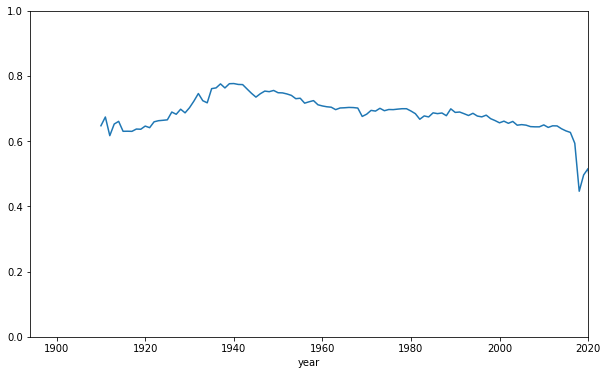

In [31]:
c = cast
gstype = c.groupby(['year', 'type']).size().unstack('type').sort_index()
((gstype.actor)/(gstype.actor + gstype.actress)).plot(ylim=[0,1], xlim=[gstype.index.min(), 2020], figsize=(10, 6))

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

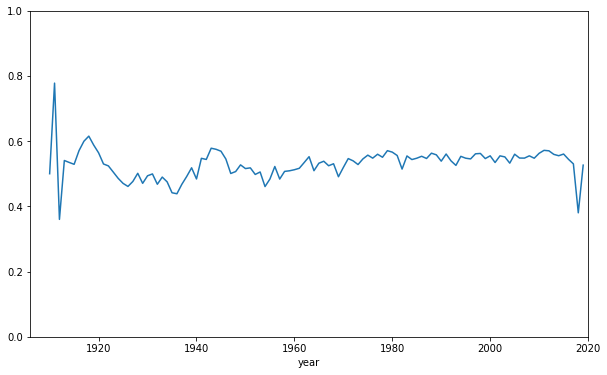

In [32]:
c = cast
c = c[c.n == 2]
gstype = c.groupby(['year', 'type']).size().unstack('type').sort_index()
((gstype.actor)/(gstype.actor + gstype.actress)).plot(ylim=[0,1], xlim=[gstype.index.min(), 2020], figsize=(10, 6))

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [22]:
c = cast
c = c[(c.n >= 1) & (c.n <= 3)]
gs = c.groupby(['year', 'type', 'n']).size()
gstype = gs.unstack('type')
frac = gstype.actor / (gstype.actor + gstype.actress)
frac = frac.fillna(0)
frac.head()

year  n  
1906  1.0    0.666667
      2.0    0.666667
      3.0    0.000000
1907  1.0    0.000000
      2.0    0.000000
dtype: float64

In [23]:
frac = frac.unstack('n')
frac.head()

n,1.0,2.0,3.0
year,,,
1906,0.666667,0.666667,0.0
1907,0.000000,0.000000,0.0
1908,0.000000,0.000000,0.0
1909,0.000000,NaN,NaN
1910,0.200000,0.500000,0.0


In [24]:
frac.index.min()

1906

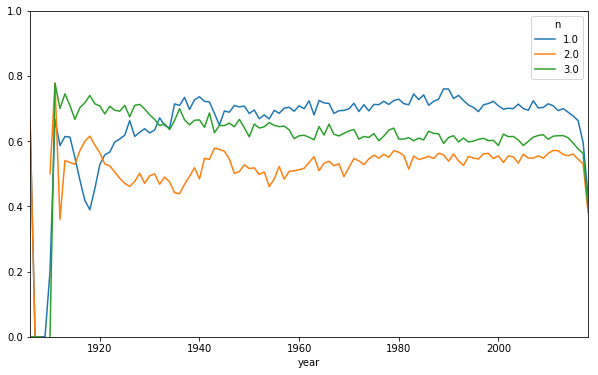

In [33]:
frac.plot(ylim=[0, 1], xlim=[frac.index.min(), 2018], figsize=(10, 6))